# 텐서플로우 (Tensorflow)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나

- 구글이 주도적으로 개발하는 플랫폼

- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원

- tf.keras를 중심으로 고수준 API 통합 (2.x 버전)

- TPU(Tensor Processing Unit) 지원
  - TPU는 GPU보다 전력을 적게 소모, 경제적
  
  - 일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤

## 텐서플로우 아키텍쳐

<img src="https://developers.google.com/machine-learning/crash-course/images/TFHierarchy.svg">

<sub>출처: https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/toolkit</sub>

## 텐서플로우 시작하기

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
print(tf.__version__)

2.3.0


### 텐서(Tensor)의 객체
- 타입(Type): `string`, `float32`, `float16`, `int32`, `int8` 등

- 형상(Shape): 0, 1, 2차원 등의 데이터 차원 

- 축(Rank): 차원의 개수

### 텐서의 차원과 연산

In [3]:
a = tf.constant(2) # 0차원 상수 설정
print(tf.rank(a)) # rank 0 
print(a)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [4]:
b = tf.constant([2, 3])
print(tf.rank(b))
print(b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)


In [5]:
c = tf.constant([[2, 3],
                 [6, 7]])
print(tf.rank(c))
print(c)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[2 3]
 [6 7]], shape=(2, 2), dtype=int32)


In [10]:
d = tf.constant(['Hello'])
print(tf.rank(d))
print(d)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([b'Hello'], shape=(1,), dtype=string)


### 난수 생성

In [11]:
rand = tf.random.uniform([1], 0, 1) # 0부터 1사이의 값 1개
print(rand.shape)
print(rand)

(1,)
tf.Tensor([0.62023294], shape=(1,), dtype=float32)


In [13]:
rand2 = tf.random.normal([1, 2], 0, 1)
print(rand2.shape)
print(rand2)

(1, 2)
tf.Tensor([[-0.29159448 -0.8726055 ]], shape=(1, 2), dtype=float32)


In [14]:
rand3 = tf.random.normal(shape = (3, 2), mean = 0, stddev = 1)
print(rand3.shape)
print(rand3)

(3, 2)
tf.Tensor(
[[-0.60596144  0.419645  ]
 [ 1.5477618  -1.341773  ]
 [-0.07856233 -0.19050355]], shape=(3, 2), dtype=float32)


### 즉시 실행 모드 (Eager Mode) 지원
- 즉시 실행모드를 통해 텐서플로우를 파이썬처럼 사용할 수 있음

- 1.x 버전에서는 '그래프'를 생성하고, 초기화 한 뒤에 세션을 통해 **값을 흐르게 하는 작업**을 진행해야함


In [15]:
a = tf.constant(3)
b = tf.constant(2)

In [16]:
print(tf.add(a, b))
print(a + b)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [17]:
print(tf.subtract(a, b))
print(a - b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [18]:
print(tf.multiply(a, b))
print(a * b)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


### 텐서 플로우 ↔ 넘파이
- `numpy()`
- `tf.convet_to_tensor()`

In [19]:
c = tf.add(a, b).numpy() # 계산 결과를 numpy로 리턴함
print(type(c))

<class 'numpy.int32'>


In [21]:
c_square = np.square(c, dtype = np.float32) # numpy square 제곱
c_tensor = tf.convert_to_tensor(c_square) # tensor 변환
print(c_tensor)
print(type(c_tensor))

tf.Tensor(25.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### 넘파이처럼 사용하기


In [22]:
t = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])
print(t.shape)
print(t.dtype)

(2, 3)
<dtype: 'float32'>


In [23]:
print(t[:, 1:])

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)


In [24]:
t[..., 1, tf.newaxis] # 축 추가 
# 1번째 열만 이용

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [25]:
t + 10  # 브로드캐스팅

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [26]:
tf.square(t) # 제곱

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [27]:
t @ tf.transpose(t) # 원래 t와 t의 트랜스포즈 행렬곱

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### 타입 변환
- 텐서의 기본 dtype
  - float형 텐서: `float32`
  - int형 텐서: `int32`

- 연산시 텐서의 타입을 맞춰줘야 함
  - `float32` ~ `float32`
  - `int32` ~ `int32`
  - `flot32` ~ `int32` (x)

- 타입변환에는 `tf.cast()` 사용

In [28]:
a = tf.constant(2)
print(a)

b = tf.constant(2.)
print(b)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
#tf.constant(2.) + tf.constant(40) # 데이터 타입 다르므로 에러 발생!

In [ ]:
#tf.constant(2.) + tf.constant(30., dtype = tf.float64)
# 같은 float인데, 비트가 달라도 안됨!

In [33]:
t = tf.constant(30., dtype = tf.float64)
t2 = tf.constant(4.)

print(t2 + tf.cast(t, tf.float32)) # 타입 변환하여 계산가능

tf.Tensor(34.0, shape=(), dtype=float32)


### AutoGraph (오토그래프)

- Tensorflow가 작업을 좀 더 빠르게 동작하게 하기 위한 방법으로 Graph로 만들어 연산을 진행

- `tf.Graph`

- 유연성이 있음

  - 모바일 애플리케이션, 임베디드 기기, 백엔드 서버와 같이 Python 인터프리터가 없는 환경에서 Tensorflow 사용 가능 

In [34]:
import timeit # 시간측정을 위해

### @tf.function
- 자동으로 그래프를 생성(Auto Graph)

- 그래프로 변환하여 사용 -> GPU 연산 가능

- 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용가능


- 원본 함수가 필요하다면 `(tf.function).python_function()`

In [40]:
@tf.function # 텐서입력도 가능해짐!
def my_function(x):
    return x ** 2 - 10 * x + 3

print(my_function(2))
print(my_function(tf.constant(2)))

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


In [41]:
def my_function_(x):
    return x ** 2 - 10 * x + 3

print(my_function_(2)) # 데코레이터 안해주면 상수로 줌
print(my_function_(tf.constant(2))) 


-13
tf.Tensor(-13, shape=(), dtype=int32)


In [42]:
tf_my_func = tf.function(my_function_) # 함수변환

print(tf_my_func)
print(tf_my_func(2)) # 텐서결과로 나옴

tf.Tensor(-13, shape=(), dtype=int32)


In [43]:
tf_my_func.python_function(2) # 일반적인 파이썬 함수처럼 나옴

-13

In [44]:
def function_to_get_faster(x, y, b):
    x = tf.matmul(x, y) # 행렬곱
    x = x + b
    return x

a_function_that_uses_a_graph = tf.function(function_to_get_faster) # 함수변환

x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0], [3.0]])
b1 = tf.constant(4.0)

a_function_that_uses_a_graph(x1, y1, b1).numpy()  # 계산하고 넘파이 변환

array([[12.]], dtype=float32)

In [46]:
def inner_function(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x

@tf.function
def outer_function(x):
    y = tf.constant([[2.0], [3.0]])
    b = tf.constant(4.0)
    return inner_function(x, y, b)

outer_function(tf.constant([[1.0, 2.0]])).numpy()

array([[12.]], dtype=float32)

텐서플로우가 `tf.function`으로 변환한 코드

In [49]:
print(tf.autograph.to_code(my_function.python_function)) # 코드변환
print(tf.autograph.to_code(tf_my_func.python_function))
print(tf.autograph.to_code(outer_function.python_function))

def tf__my_function(x):
    with ag__.FunctionScope('my_function', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def tf__my_function_(x):
    with ag__.FunctionScope('my_function_', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def 


 속도 향상


In [52]:
class SequentialModel(tf.keras.Model):
    
    def __init__(self, **kwargs):
        super(SequentialModel, self).__init__(**kwargs)

        self.flatten = tf.keras.layers.Flatten(input_shape = (28, 28))
        self.dense_1 = tf.keras.layers.Dense(128, activation = 'relu')
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.dense_2 = tf.keras.layers.Dense(10)

    def call(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.dropout(x)
        x = self.dense_2(x)
        return x

input_data = tf.random.uniform([60, 28, 28])

eager_model = SequentialModel() # 그냥 사용
graph_model = tf.function(eager_model) # 그래프 모델로 바꾼거

print("Eager time:", timeit.timeit(lambda: eager_model(input_data), number = 10000))
print("Graph time:", timeit.timeit(lambda: graph_model(input_data), number = 10000))
# 그래프 모델이 더 빠르게 동작함을 알 수 있다!

Eager time: 7.729749158999766
Graph time: 4.452459016000375


### 변수 생성

- `tf.Variable`
- 딥러닝 모델 학습 시, 그래프 연산이 필요할 때 사용

In [53]:
X = tf.Variable(20.0) # 변수 설정

print(X)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


### Autograd (자동 미분)

- `tf.GradientTape` API를 사용
- `tf.Variable` 같은 일부 입력에 대한 기울기 계산
  - 기본적으로 한번만 사용됨
- 변수가 포함된 연산만 기록

In [54]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x ** 2
    

In [55]:
dy_dx = tape.gradient(y, x) # 미분하고 3.0 입력하면
dy_dx.numpy() # 6.0의 그래디언트가 나옴

6.0

In [ ]:
#x2 = tf.Variable(4)
#dy_dx = tape.gradient(y, x2)
#dy_dx.numpy()
# 한번만 호출되므로 안됨! 오류 발생을 막기 위해 일부러 막아둠..

In [58]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y_sq = y ** 2
    z = x ** 2 + tf.stop_gradient(y_sq)

grad = tape.gradient(z, {'x': x, 'y': y})

print("dz/dx:", grad['x']) # x에 대한 그레디언트
print("dx/dy:", grad['y']) # y에 대한 그레디언트

dz/dx: tf.Tensor(4.0, shape=(), dtype=float32)
dx/dy: None


In [59]:
weights = tf.Variable(tf.random.normal((3, 2), name = 'weights'))
biases  = tf.Variable(tf.zeros(2, dtype = tf.float32), name = 'biases')

x = [[1., 2., 3.]]

with tf.GradientTape(persistent = True) as tape:
    y = x @ weights + biases
    loss = tf.reduce_mean(y ** 2)

In [60]:
[dl_dw, dl_db] = tape.gradient(loss, [weights, biases])

In [61]:
print(weights.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [64]:
weight2 = tf.Variable(tf.random.normal((3, 2)), name = 'weights')
biases2 = tf.Variable(tf.zeros(2, dtype = tf.float32), name = 'biases')

x2 = [[4., 5., 6.]]

[dl_dw2, dl_db2] = tape.gradient(loss, [weight2, biases2])

print(weight2.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [65]:
del tape # 사용하지 않을 때는 삭제!

## 간단한 신경망 구조 

### 뉴런
- 입력 → 연산 → 활성화함수 → 출력

In [66]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def Neuron(x, W, bias = 0):
    z = x * W + bias
    return sigmoid(z)
    

In [67]:
x = tf.random.normal((1, 2), 0, 1)
W = tf.random.normal((1, 2), 0, 1)

print("x.shape:", x.shape)
print("W.shape:", W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape: (1, 2)
W.shape: (1, 2)
tf.Tensor([[-2.0134568  -0.24999796]], shape=(1, 2), dtype=float32)
tf.Tensor([[-1.1113241  -0.44159907]], shape=(1, 2), dtype=float32)
[[0.9035758  0.52757174]]


In [68]:
x = tf.random.normal((2, 1), 0, 1)
W = tf.random.normal((2, 1), 0, 1)

print("x.shape:", x.shape)
print("W.shape:", W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape: (2, 1)
W.shape: (2, 1)
tf.Tensor(
[[-0.75860864]
 [ 1.2009213 ]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[ 0.09856226]
 [-0.01271839]], shape=(2, 1), dtype=float32)
[[0.48131615]
 [0.49618167]]


In [69]:
x = tf.random.normal((1,), 0, 1)
W = tf.random.normal((2, 1), 0, 1)

print("x.shape:", x.shape)
print("W.shape:", W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape: (1,)
W.shape: (2, 1)
tf.Tensor([-1.3058163], shape=(1,), dtype=float32)
tf.Tensor(
[[ 0.0251821]
 [-1.9590131]], shape=(2, 1), dtype=float32)
[[0.49177992]
 [0.92811656]]


### 퍼셉트론 학습 알고리즘 (가중치 업데이트)

## $\qquad w^{(next step)} = w + \eta \ (y - \tilde{y}) \ x$

- $w \ $: 가중치

- $\eta \ $ : 학습률

- $y \ $ : 정답 레이블

- $\tilde{y} \ $: 예측 레이블


In [70]:
x = 1
y = 0
W = tf.random.normal([1], 0, 1)
print(Neuron(x, W))
print("y:", y) # 하나의 뉴런을 거쳐 나오는 결과

[0.3033073]
y: 0


In [72]:
for i in range(1000):
    output = Neuron(x, W)
    error = y - output 
    W = W + x * 0.1 * error # 가중치 업데이트

    if i % 100 == 99:
        print("{}\t{}\t{}".format(i + 1, error, output))

100	[-0.08532329]	[0.08532329]
200	[-0.04734839]	[0.04734839]
300	[-0.03252261]	[0.03252261]
400	[-0.0247044]	[0.0247044]
500	[-0.01989339]	[0.01989339]
600	[-0.01664031]	[0.01664031]
700	[-0.01429627]	[0.01429627]
800	[-0.012528]	[0.012528]
900	[-0.0111472]	[0.0111472]
1000	[-0.01003935]	[0.01003935]


In [75]:
def Neuron2(x, W, bias = 0):
    z = tf.matmul(x, W, transpose_b = True) + bias # 가중치를 트랜스포즈
    return sigmoid(z)

In [76]:
x = tf.random.normal((1, 3), 0, 1)
y = tf.ones(1)
W = tf.random.normal((1, 3), 0, 1)

print(Neuron2(x, W))
print("y:", y)

[[0.7483971]]
y: tf.Tensor([1.], shape=(1,), dtype=float32)


In [77]:
for i in range(1000):
    output = Neuron2(x, W)
    error = y - output
    W = W + x * 0.1 * error

    if i % 100 == 99:
        print("{}\t{}\t{}".format(i + 1, error, output))


100	[[0.03149188]]	[[0.9685081]]
200	[[0.01631808]]	[[0.9836819]]
300	[[0.010984]]	[[0.989016]]
400	[[0.0082714]]	[[0.9917286]]
500	[[0.00663084]]	[[0.99336916]]
600	[[0.00553226]]	[[0.99446774]]
700	[[0.00474548]]	[[0.9952545]]
800	[[0.00415426]]	[[0.99584574]]
900	[[0.00369394]]	[[0.99630606]]
1000	[[0.00332522]]	[[0.9966748]]


In [78]:
x = tf.random.normal((1, 3), 0, 1)
weights = tf.random.normal((1, 3), 0, 1)
bias = tf.zeros((1, 1))

y = tf.ones((1,))

print("x\t: {}\nweight\t: {}\nbias\t: {}".format(x, weights, bias))

x	: [[-1.7037576 -0.7030087  1.5369339]]
weight	: [[-2.0991952  -0.9470716   0.16940439]]
bias	: [[0.]]


In [79]:
for i in range(1000):
    output = Neuron2(x, weights, bias = bias)
    error = y - output
    weights = weights +  x * 0.1 * error
    bias = bias + 1 * 0.1 * error

    if i % 100 == 99:
        print("{}\t{}\t{}".format(i + 1, error, output))


100	[[0.00633681]]	[[0.9936632]]
200	[[0.00444126]]	[[0.99555874]]
300	[[0.00341791]]	[[0.9965821]]
400	[[0.00277746]]	[[0.99722254]]
500	[[0.00233912]]	[[0.9976609]]
600	[[0.00202018]]	[[0.9979798]]
700	[[0.00177771]]	[[0.9982223]]
800	[[0.00158727]]	[[0.9984127]]
900	[[0.00143355]]	[[0.99856645]]
1000	[[0.00130707]]	[[0.9986929]]


In [80]:
print("x\t: {}\nweight\t: {}\nbias\t: {}".format(x, weights, bias))

x	: [[-1.7037576 -0.7030087  1.5369339]]
weight	: [[-2.6378303  -1.1693231   0.65529823]]
bias	: [[0.31614476]]


### AND Gate

In [81]:
X = np.array([[1, 1],
              [1, 0],
              [0, 1],
              [0, 0]])
Y = np.array([[1],
              [0],
              [0],
              [0]])

W = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0

    for j in range(4):
        output = sigmoid(np.sum(X[j] * W) + b_x + b)
        error = Y[j][0] - output
        W = W + X[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error

    if i % 200 == 0:
        print("Epoch {:4d}\tError Sum {}".format(i, error_sum))

print("\n가중치\t: {}".format(W))
print("편향\t: {}".format(b))

Epoch    0	Error Sum [-1.9430468]
Epoch  200	Error Sum [-0.11793822]
Epoch  400	Error Sum [-0.06831738]
Epoch  600	Error Sum [-0.04799742]
Epoch  800	Error Sum [-0.03688366]
Epoch 1000	Error Sum [-0.02989209]
Epoch 1200	Error Sum [-0.02509808]
Epoch 1400	Error Sum [-0.02161144]
Epoch 1600	Error Sum [-0.01896675]
Epoch 1800	Error Sum [-0.01689022]

가중치	: [6.953258  6.9564257]
편향	: [-11.609068]


In [82]:
# 평가하기
for i in range(4):
    print("X: {} Y: {} Output: {}".format(X[i], Y[i], sigmoid(np.sum(X[i] * W) + b)))

X: [1 1] Y: [1] Output: [0.908928]
X: [1 0] Y: [0] Output: [0.00941669]
X: [0 1] Y: [0] Output: [0.00944629]
X: [0 0] Y: [0] Output: [9.083264e-06]


### OR Gate

In [83]:
X2 = np.array([[1, 1],
              [1, 0],
              [0, 1],
              [0, 0]])
Y2 = np.array([[1],
              [1],
              [1],
              [0]])
W2 = tf.random.normal([2], 0, 1)
b2 = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0

    for j in range(4):
        output = sigmoid(np.sum(X2[j] * W2) + b_x + b2)
        error = Y2[j][0] - output
        W2 = W2 + X2[j] * 0.1 * error
        b2 = b2 + b_x * 0.1 * error
        error_sum += error

    if i % 200 == 0:
        print("Epoch {:4d}\tError Sum {}".format(i, error_sum))

print("\n가중치\t: {}".format(W2))
print("편향\t: {}".format(b2))

Epoch    0	Error Sum [-0.33293366]
Epoch  200	Error Sum [-0.05429633]
Epoch  400	Error Sum [-0.02715412]
Epoch  600	Error Sum [-0.0179784]
Epoch  800	Error Sum [-0.01338642]
Epoch 1000	Error Sum [-0.01064222]
Epoch 1200	Error Sum [-0.00882192]
Epoch 1400	Error Sum [-0.00752827]
Epoch 1600	Error Sum [-0.00656239]
Epoch 1800	Error Sum [-0.00581466]

가중치	: [8.187803 8.186651]
편향	: [-4.627983]


In [86]:
# 평가하기
for i in range(4):
    print("X: {} Y: {} Output: {}".format(X2[i], Y2[i], sigmoid(np.sum(X2[i] * W2) + b2)))

X: [1 1] Y: [1] Output: [0.99999213]
X: [1 0] Y: [1] Output: [0.9723427]
X: [0 1] Y: [1] Output: [0.97231174]
X: [0 0] Y: [0] Output: [0.00967984]


### XOR Gate

In [85]:
X3 = np.array([[1, 1],
              [1, 0],
              [0, 1],
              [0, 0]])
Y3 = np.array([[0],
              [1],
              [1],
              [0]])
W3 = tf.random.normal([2], 0, 1)
b3 = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0

    for j in range(4):
        output = sigmoid(np.sum(X3[j] * W3) + b_x + b3)
        error = Y3[j][0] - output
        W3 = W3 + X3[j] * 0.1 * error
        b3 = b3 + b_x * 0.1 * error
        error_sum += error

    if i % 200 == 0:
        print("Epoch {:4d}\tError Sum {}".format(i, error_sum))

print("\n가중치\t: {}".format(W3))
print("편향\t: {}".format(b3))

Epoch    0	Error Sum [-1.4285295]
Epoch  200	Error Sum [-0.0012033]
Epoch  400	Error Sum [-4.887581e-05]
Epoch  600	Error Sum [-2.026558e-06]
Epoch  800	Error Sum [-1.013279e-06]
Epoch 1000	Error Sum [-1.013279e-06]
Epoch 1200	Error Sum [-1.013279e-06]
Epoch 1400	Error Sum [-1.013279e-06]
Epoch 1600	Error Sum [-1.013279e-06]
Epoch 1800	Error Sum [-1.013279e-06]

가중치	: [ 5.1279657e-02 -2.0749867e-06]
편향	: [-0.999997]


In [87]:
# 평가하기
for i in range(4):
    print("X: {} Y: {} Output: {}".format(X3[i], Y3[i], sigmoid(np.sum(X3[i] * W3) + b3)))

# XOR 문제이므로 Single Perceptron으로는 풀리지 않는다!

X: [1 1] Y: [0] Output: [0.27914244]
X: [1 0] Y: [1] Output: [0.27914283]
X: [0 1] Y: [1] Output: [0.2689416]
X: [0 0] Y: [0] Output: [0.26894203]


In [92]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(111)

X4 = np.array([[1, 1],
               [1, 0],
               [0, 1],
               [0, 0]])
Y4 = np.array([[0],
              [1],
              [1],
              [0]])

model = Sequential([Dense(units = 2, activation = 'sigmoid', input_shape = (2,)),
                    Dense(units = 1, activation = 'sigmoid')])

model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.1), loss = 'mse')
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [93]:
history = model.fit(X4, Y4, epochs = 2000, batch_size = 1, verbose = 0)

In [96]:
model.predict(X4) # 학습 잘안됨!


array([[0.5062649 ],
       [0.48097456],
       [0.89282006],
       [0.11474851]], dtype=float32)

## 시각화 사용

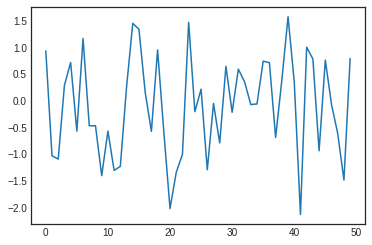

In [95]:
import matplotlib.pyplot as plt
plt.style.use(['seaborn-white'])

x = range(50)
y = tf.random.normal([50], 0, 1)
plt.plot(x, y)
plt.show()

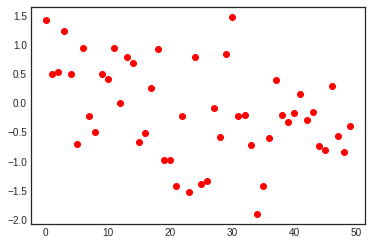

In [97]:

x = range(50)
y = tf.random.normal([50], 0, 1)
plt.plot(x, y, 'ro')
plt.show()

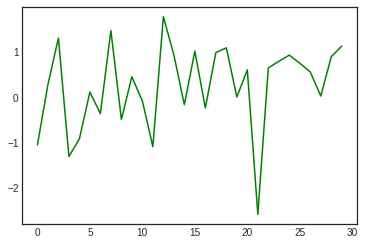

In [99]:

x = range(30)
y = tf.random.normal([30], 0, 1)
plt.plot(x, y, 'g-')
plt.show()

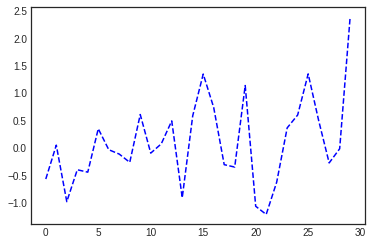

In [100]:

x = range(30)
y = tf.random.normal([30], 0, 1)
plt.plot(x, y, 'b--')
plt.show()

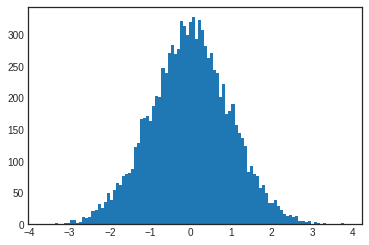

In [101]:
random_normal = tf.random.normal([10000], 0, 1)
plt.hist(random_normal, bins = 100)
plt.show()

### XOR Gate의 'LOSS' 시각화


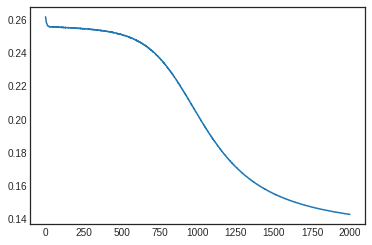

In [102]:
plt.plot(history.history['loss'])